In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '.../data'

Mounted at /content/drive


In [2]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics
import numpy as np
import random
from collections import defaultdict

In [3]:
def create_age_biased_test_set(df, non_df, bias):
    """
    Creates a biased test set where the proportion of individuals younger than 41 is adjusted
    according to the specified bias in two datasets: `df` and `non_df`.

    Parameters:
        df (DataFrame): The primary dataset (e.g., dataset with specific samples).
        non_df (DataFrame): The secondary dataset (e.g., complementary dataset).
        bias (float): The desired proportion of individuals younger than 41 in the `df` dataset.

    Returns:
        DataFrame: A concatenated DataFrame with the adjusted proportion of individuals younger than 41
                    in both datasets (`df` and `non_df`).
    """

    # Calculate the current proportion of individuals younger than 41 in both datasets
    prop1 = sum(df['Age'] < 41) / len(df)
    prop2 = sum(non_df['Age'] < 41) / len(non_df)

    # Adjust the `df` dataset based on the desired bias level
    if bias <= prop1:
        # If the target bias is smaller or equal to the current proportion of individuals younger than 41,
        # oversample individuals younger than 41 to reach the desired bias.
        biased_df = pd.concat([
            df,
            df[df['Age'] < 41].sample(
                int((sum(df['Age'] < 41) - len(df) * bias) / (1 - bias)),
                random_state=2022
            )
        ]).drop_duplicates(subset=['Path'], keep=False)
    else:
        # If the target bias is larger than the current proportion of individuals younger than 41,
        # oversample individuals 41 or older to reach the desired bias.
        biased_df = pd.concat([
            df,
            df[df['Age'] >= 41].sample(
                int((sum(df['Age'] >= 41) - len(df) * (1 - bias)) / bias),
                random_state=2022
            )
        ]).drop_duplicates(subset=['Path'], keep=False)

    bias2 = 1 - bias

    # Adjust the `non_df` dataset similarly based on the complementary bias
    if bias2 <= prop2:
        biased_non_df = pd.concat([
            non_df,
            non_df[non_df['Age'] < 41].sample(
                int((sum(non_df['Age'] < 41) - len(non_df) * bias2) / (1 - bias2)),
                random_state=2022
            )
        ]).drop_duplicates(subset=['Path'], keep=False)
    else:
        biased_non_df = pd.concat([
            non_df,
            non_df[non_df['Age'] >= 41].sample(
                int((sum(non_df['Age'] >= 41) - len(non_df) * (1 - bias2)) / bias2),
                random_state=2022
            )
        ]).drop_duplicates(subset=['Path'], keep=False)


    return pd.concat([biased_df, biased_non_df])


def binarize_by_sex(df):
  #Splits a dataset into two subsets based on sex: one for males and another for females.
  male_df = df[df['Gender']=='M']
  female_df = df[df['Gender']=='F']
  return(male_df, female_df)

*CheXpert* Trained;
MIMIC Tested

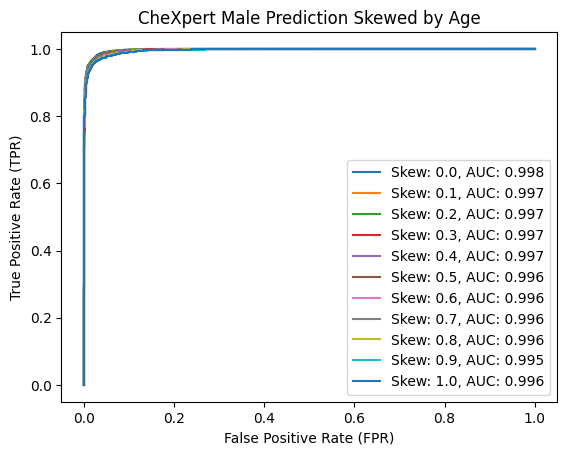

In [4]:
  df = pd.read_csv(path + '/chexpert_gender_mimic_test.csv')
  df = df.rename(columns={'age': 'Age'})
  df = df[~df['Age'].isna()]
  df['Gender_Probability'] = df['Gender_Probability'].str.rstrip(']')
  df['Gender_Probability'] = df['Gender_Probability'].str.lstrip('[')
  df['Gender_Probability'] = df['Gender_Probability'].apply(np.fromstring, sep=',', dtype = float)
  male_df, female_df = binarize_by_sex(df)
  for bias in np.arange(0, 1.1, 0.1):
      biased_test_df = create_age_biased_test_set(male_df, female_df, bias)
      fpr, tpr, _ = metrics.roc_curve(y_true = biased_test_df['Gender'],y_score = [prob[1] for prob in biased_test_df['Gender_Probability']], pos_label = 'M')
      auc = metrics.auc(fpr, tpr)
      plt.plot(fpr, tpr, label=f'Skew: {bias:.1f}, AUC: {auc:.3f}')
  # Add labels, title, and legend
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.legend(loc='lower right')
  plt.title('CheXpert Male Prediction Skewed by Age')
  # Show the plot
  plt.show()

CheXpert Trained; CheXpert Tested

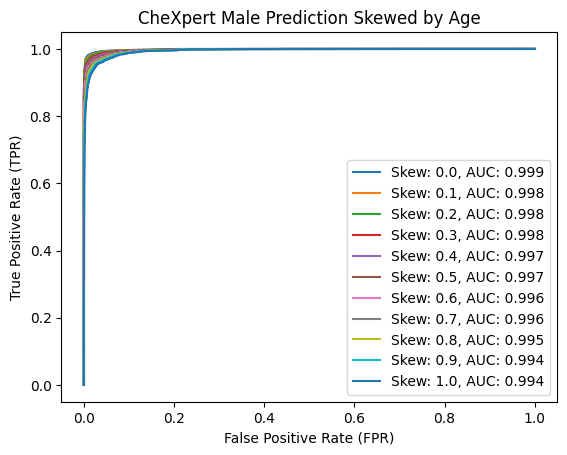

In [5]:
  df = pd.read_csv(path + '/chexpert_gender_chexpert_test.csv')
  df = df.rename(columns={'age': 'Age'})
  df = df[~df['Age'].isna()]
  df['Gender_Probability'] = df['Gender_Probability'].str.rstrip(']')
  df['Gender_Probability'] = df['Gender_Probability'].str.lstrip('[')
  df['Gender_Probability'] = df['Gender_Probability'].apply(np.fromstring, sep=',', dtype = float)
  male_df, female_df = binarize_by_sex(df)
  for bias in np.arange(0, 1.1, 0.1):
      biased_test_df = create_age_biased_test_set(male_df, female_df, bias)
      fpr, tpr, _ = metrics.roc_curve(y_true = biased_test_df['Gender'],y_score = [prob[1] for prob in biased_test_df['Gender_Probability']], pos_label = 'M')
      auc = metrics.auc(fpr, tpr)
      plt.plot(fpr, tpr, label=f'Skew: {bias:.1f}, AUC: {auc:.3f}')
  # Add labels, title, and legend
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.legend(loc='lower right')
  plt.title('CheXpert Male Prediction Skewed by Age')
  # Show the plot
  plt.show()

MIMIC Trained; MIMIC Tested

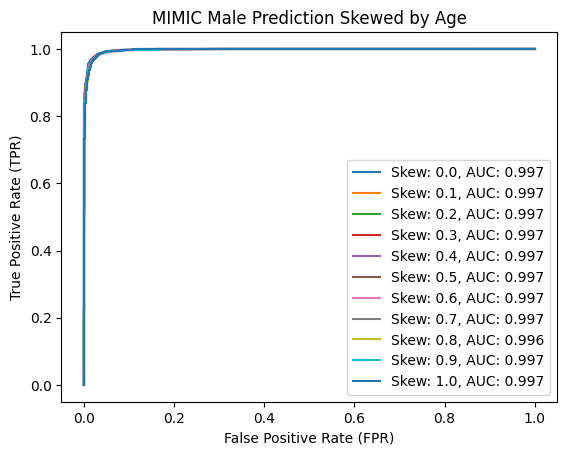

In [6]:
  df = pd.read_csv(path + '/mimic_gender_mimic_test.csv')
  df = df.rename(columns={'age': 'Age'})
  df = df[~df['Age'].isna()]
  df['Gender_Probability'] = df['Gender_Probability'].str.rstrip(']')
  df['Gender_Probability'] = df['Gender_Probability'].str.lstrip('[')
  df['Gender_Probability'] = df['Gender_Probability'].apply(np.fromstring, sep=',', dtype = float)
  male_df, female_df = binarize_by_sex(df)
  for bias in np.arange(0, 1.1, 0.1):
      biased_test_df = create_age_biased_test_set(male_df, female_df, bias)
      fpr, tpr, _ = metrics.roc_curve(y_true = biased_test_df['Gender'],y_score = [prob[1] for prob in biased_test_df['Gender_Probability']], pos_label = 'M')
      auc = metrics.auc(fpr, tpr)
      plt.plot(fpr, tpr, label=f'Skew: {bias:.1f}, AUC: {auc:.3f}')
  # Add labels, title, and legend
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.legend(loc='lower right')
  plt.title('MIMIC Male Prediction Skewed by Age')
  # Show the plot
  plt.show()

MIMIC Trained; CheXpert Tested

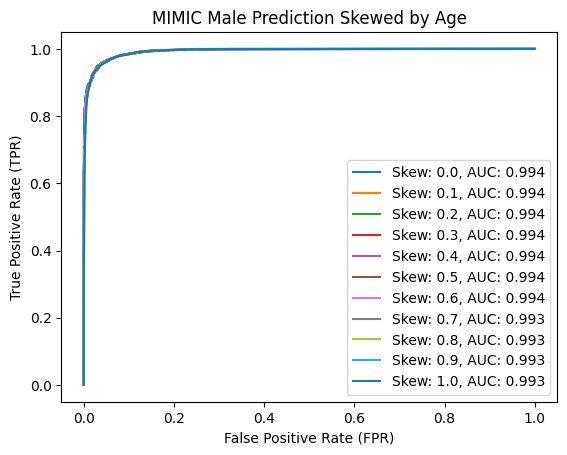

In [7]:
  df = pd.read_csv(path + '/mimic_gender_chexpert_test.csv')
  df = df.rename(columns={'age': 'Age'})
  df = df[~df['Age'].isna()]
  df['Gender_Probability'] = df['Gender_Probability'].str.rstrip(']')
  df['Gender_Probability'] = df['Gender_Probability'].str.lstrip('[')
  df['Gender_Probability'] = df['Gender_Probability'].apply(np.fromstring, sep=',', dtype = float)
  male_df, female_df = binarize_by_sex(df)
  for bias in np.arange(0, 1.1, 0.1):
      biased_test_df = create_age_biased_test_set(male_df, female_df, bias)
      fpr, tpr, _ = metrics.roc_curve(y_true = biased_test_df['Gender'],y_score = [prob[1] for prob in biased_test_df['Gender_Probability']], pos_label = 'M')
      auc = metrics.auc(fpr, tpr)
      plt.plot(fpr, tpr, label=f'Skew: {bias:.1f}, AUC: {auc:.3f}')
  # Add labels, title, and legend
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.legend(loc='lower right')
  plt.title('MIMIC Male Prediction Skewed by Age')
  # Show the plot
  plt.show()